In [71]:
#!unzip authorship_attribution.zip


# Sankar Subbayya - Authorship attribution
This notebook uses the classical reuters authorship attribution data. Given a set of article and names of authors, the model is used to predict the author of the article from the content of the article 

In [24]:
#!pip install wordcloud

In [33]:
import os 
import  numpy as np
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [34]:
# extract_data extracts the text and author from the dataset
def extract_data(authors_path):
    authors = os.listdir(authors_path)
    AX = []
    ay = []  
    for a in authors:
        auth_dir = os.path.join(authors_path,a)
        files = os.listdir(auth_dir)
        for file in files:
            with open(os.path.join(auth_dir, file)) as f:
                data = f.read()
                AX.append(data)
                ay.append(a)
    return AX, ay

In [35]:
## call the extract_data function to extract the training and test data
authors_train_path =  'train/'
authors_test_path =   'test/'

AX_train, ay_train = extract_data(authors_train_path)
AX_test, ay_test = extract_data(authors_test_path)
shuffle_index = np.random.permutation(len(AX_train))
AX_train, ay_train = shuffle(AX_train, ay_train)

In [36]:
len(AX_train), len(ay_train), len(AX_test), len(ay_test)

(2500, 2500, 2500, 2500)

In [37]:
## Calculating the TfidfVectorizer
stopwords_list = stopwords.words('english')
Vectorizer = TfidfVectorizer(analyzer = 'word', ngram_range = (1,2), min_df = 0.001, max_df = 0.1, 
                            stop_words = stopwords_list, token_pattern = u'(?ui)\\b\\w*[a-z]+\\w*\\b')
vectors_train = Vectorizer.fit_transform(AX_train)
vectors_test = Vectorizer.transform(AX_test)
print(vectors_train.shape, vectors_test.shape)
feature_names = Vectorizer.get_feature_names()


(2500, 60686) (2500, 60686)


## Support Vector Classifier

In [38]:
## Using the support vector machines to build the model and predict the test set
##%%time
svm_clf = LinearSVC()
svm_clf.fit(vectors_train, ay_train)
svm_test_pred = svm_clf.predict(vectors_test)

In [39]:

print(classification_report(ay_test, svm_test_pred))

                   precision    recall  f1-score   support

    AaronPressman       0.87      0.94      0.90        50
       AlanCrosby       0.79      0.46      0.58        50
   AlexanderSmith       0.53      0.20      0.29        50
  BenjaminKangLim       0.33      0.28      0.30        50
    BernardHickey       0.94      0.66      0.78        50
      BradDorfman       0.65      0.86      0.74        50
 DarrenSchuettler       0.34      0.28      0.31        50
      DavidLawder       0.68      0.50      0.57        50
    EdnaFernandes       0.93      0.50      0.65        50
      EricAuchard       0.42      0.48      0.45        50
   FumikoFujisaki       0.96      1.00      0.98        50
   GrahamEarnshaw       0.67      0.92      0.77        50
 HeatherScoffield       0.32      0.38      0.35        50
       JanLopatka       0.59      0.40      0.48        50
    JaneMacartney       0.24      0.20      0.22        50
     JimGilchrist       0.89      1.00      0.94       

In [13]:
ay_train.index('ScottHillis')

22

In [14]:
ay_train

['BernardHickey',
 'JonathanBirt',
 'LydiaZajc',
 "LynneO'Donnell",
 'TimFarrand',
 'JohnMastrini',
 'SarahDavison',
 'JaneMacartney',
 'SarahDavison',
 'TheresePoletti',
 'KevinMorrison',
 'MureDickie',
 'MichaelConnor',
 'SarahDavison',
 'TimFarrand',
 'KevinMorrison',
 'JaneMacartney',
 'KevinDrawbaugh',
 'SamuelPerry',
 'GrahamEarnshaw',
 'MartinWolk',
 'MureDickie',
 'ScottHillis',
 'JonathanBirt',
 'SimonCowell',
 'PatriciaCommins',
 'AaronPressman',
 'RogerFillion',
 'TimFarrand',
 'KirstinRidley',
 'KevinDrawbaugh',
 'TimFarrand',
 'WilliamKazer',
 'FumikoFujisaki',
 'MarcelMichelson',
 'KarlPenhaul',
 'RobinSidel',
 'ToddNissen',
 'PatriciaCommins',
 'PatriciaCommins',
 'KouroshKarimkhany',
 'BenjaminKangLim',
 'KouroshKarimkhany',
 'ScottHillis',
 'HeatherScoffield',
 'MatthewBunce',
 'BenjaminKangLim',
 'RobinSidel',
 'JoeOrtiz',
 'MartinWolk',
 'JanLopatka',
 'ToddNissen',
 'GrahamEarnshaw',
 'LynnleyBrowning',
 'BernardHickey',
 'PatriciaCommins',
 'JimGilchrist',
 'RogerF

In [40]:
print(accuracy_score(ay_test,svm_test_pred))


0.6636


In [57]:
import scipy
import numpy

In [58]:
id  = [ i for i, name in enumerate(ay_train) if name == 'ScottHillis']

In [85]:
def get_tf_idf_dict_train(author, top_n = 100):
    id  = [ i for i, name in enumerate(ay_train) if name == author]
    author_profiles = []
    for i in id:
        author_profile = vectors_train[i:i+1]
        author_profiles.append(author_profile)
    author_profiles = scipy.sparse.vstack(author_profiles).sum(axis =0)
    author_tf_idf = zip(author_profiles.T, feature_names)
    author_tf_idf_sorted  = sorted(author_tf_idf, reverse = True)[:top_n]
    author_tf_idf_dict ={}
    for tf, term in author_tf_idf_sorted:
        author_tf_idf_dict[term] = numpy.asscalar(tf)
    return author_tf_idf_dict

def get_tf_idf_dict_test(author, top_n = 100):
    id  = [ i for i, name in enumerate(ay_test) if name == author]
    author_profiles = []
    for i in id:
        author_profile = vectors_test[i:i+1]
        author_profiles.append(author_profile)
    author_profiles = scipy.sparse.vstack(author_profiles).sum(axis =0)
    author_tf_idf = zip(author_profiles.T, feature_names)
    author_tf_idf_sorted  = sorted(author_tf_idf, reverse = True)[:top_n]
    author_tf_idf_dict ={}
    for tf, term in author_tf_idf_sorted:
        author_tf_idf_dict[term] = numpy.asscalar(tf)
    return author_tf_idf_dict


def plot_user_word_cloud_train(user, top_n = 100):
    author_tf_idf_dict = get_tf_idf_dict_train(user, top_n)
    wc = WordCloud( background_color = 'white').generate_from_frequencies(author_tf_idf_dict)
    plt.figure()
    plt.axis('off')
    plt.imshow(wc)
    
    
def plot_user_word_cloud_test(user, top_n = 100):
    author_tf_idf_dict = get_tf_idf_dict_test(user, top_n)
    wc = WordCloud( background_color = 'white').generate_from_frequencies(author_tf_idf_dict)
    plt.figure()
    plt.axis('off')
    plt.imshow(wc)

In [86]:
scott_hillis_tfidf_train = get_tf_idf_dict_train('ScottHillis')

In [81]:
aaron_pressman_tfidf = get_tf_idf_dict('AaronPressman')

# Why does the model performs very poorly for some authors and verry well for some authors for example Scott Hillis


In [82]:
scott_hillis_tfidf


{'affairs': 0.5781665125265363,
 'agency': 0.6467759268949367,
 'agency said': 0.5173920955805348,
 'apec': 0.5596228916218109,
 'arms': 0.5398882458271891,
 'army': 1.0014672152448112,
 'authorities': 0.5644771403968541,
 'billion yuan': 0.6170372129512868,
 'bomber': 0.7503797050439045,
 'cases': 0.5880519262604529,
 'chen': 0.6713910740737795,
 'chi': 0.5186819724920808,
 'christopher': 0.5383720030009944,
 'civil': 0.6010376549375289,
 'coal': 0.6084107460476674,
 'commentary': 0.6696819004387335,
 'communist': 1.1617445659224286,
 'communist party': 0.6372159077505708,
 'cooperation': 0.6963892025355735,
 'corruption': 0.6441475464387549,
 'court': 0.5616396342409593,
 'courts': 0.4879030062426588,
 'crash': 0.613484634307394,
 'crash site': 0.5948549485829396,
 'dalai': 1.0435527756776208,
 'dalai lama': 0.8957569739306519,
 'dam': 0.6481259197652204,
 'dan': 0.6852931496613607,
 'davis': 0.5829844053917603,
 'defence': 0.8737931783367106,
 'democracy': 0.6286746514789593,
 'deng

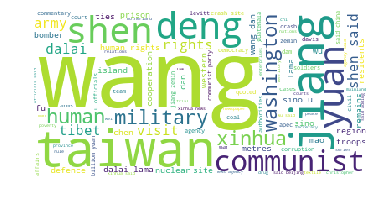

In [83]:
plot_user_word_cloud_train('ScottHillis', 100)

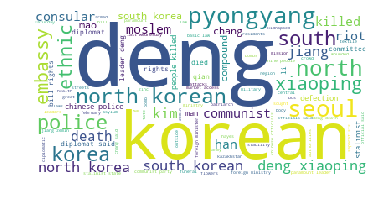

In [95]:
plot_user_word_cloud_test('ScottHillis', top_n = 100)

# It looks like the articles authored by Scott Hillis in the training set deals with Taiwan and China related while the articles in the testset are related to Korea. Training set articles and  test set article  deal with different subjects  and  hence classifier based on text does not perform well for Scott Hillis, While Aaron Presssman training set and  test set have very similar content and hence text based classifier perform well

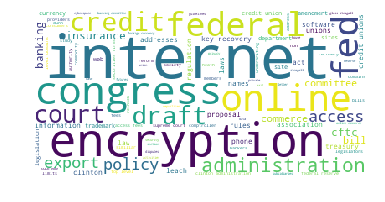

In [90]:
plot_user_word_cloud_train('AaronPressman', 100)


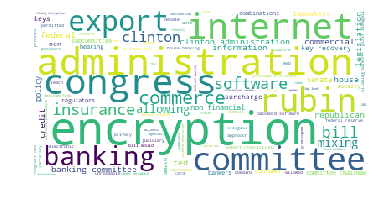

In [91]:
plot_user_word_cloud_test('AaronPressman', 100)

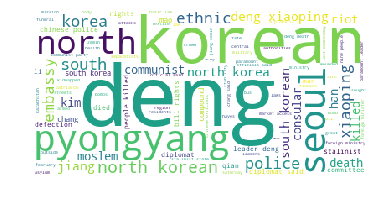

In [88]:
plot_user_word_cloud_test('ScottHillis', top_n = 100)

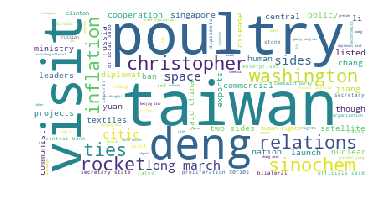

In [93]:
plot_user_word_cloud_train('WilliamKazer', top_n = 100)

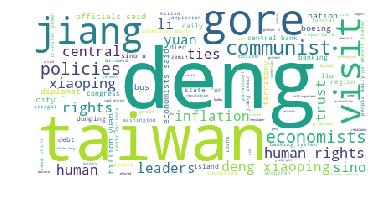

In [94]:
plot_user_word_cloud_test('WilliamKazer', top_n = 100)

In [63]:
from collections import Counter

In [80]:
vectors_train[18,:].tocoo().data

array([0.04621235, 0.03506352, 0.01431777, 0.02492238, 0.04017917,
       0.08613002, 0.01331497, 0.20072911, 0.04491246, 0.14366487,
       0.02761122, 0.03114048, 0.06521545, 0.03640753, 0.00739036,
       0.06208178, 0.07187247, 0.02301397, 0.01939602, 0.01399907,
       0.02741271, 0.06894053, 0.01420769, 0.12058202, 0.0151161 ,
       0.01385226, 0.02797708, 0.01336056, 0.00873243, 0.01293249,
       0.03396887, 0.03096691, 0.01719729, 0.02078786, 0.03238272,
       0.02655946, 0.01247653, 0.03106561, 0.01537161, 0.01363318,
       0.01663293, 0.00736898, 0.01244689, 0.03383163, 0.0253153 ,
       0.01443155, 0.01584607, 0.00857602, 0.00744262, 0.01751135,
       0.00651241, 0.0129486 , 0.04063698, 0.01015609, 0.07011969,
       0.01322116, 0.03295869, 0.02927627, 0.01717955, 0.01655677,
       0.02337323, 0.00949217, 0.01661537, 0.01769085, 0.01090141,
       0.04120211, 0.02656136, 0.02244874, 0.00866323, 0.01271157,
       0.01449457, 0.02145184, 0.01831357, 0.02098858, 0.00755

In [82]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
 

In [83]:
sorted_items  = sort_coo(vectors_train[18,:].tocoo())

In [ ]:
s

In [86]:
keywords=extract_topn_from_vector(features,sorted_items,50)

In [100]:
keywords


{'chip': 0.152,
 'chipmakers': 0.085,
 'chips': 0.116,
 'gains': 0.13,
 'gumport': 0.093,
 'in': 0.121,
 'intel': 0.591,
 'klesken': 0.207,
 'megabit': 0.093,
 'memory': 0.247,
 'of': 0.144,
 'pc': 0.079,
 'quarter': 0.16,
 'revenues': 0.076,
 'robertson': 0.097,
 'semiconductor': 0.087,
 'stock': 0.077,
 'the': 0.201,
 'to': 0.086,
 'year': 0.076}

In [93]:
coo_matrix = vectors_train[18,:].tocoo()

In [96]:
coo_matrix.data

array([0.04621235, 0.03506352, 0.01431777, 0.02492238, 0.04017917,
       0.08613002, 0.01331497, 0.20072911, 0.04491246, 0.14366487,
       0.02761122, 0.03114048, 0.06521545, 0.03640753, 0.00739036,
       0.06208178, 0.07187247, 0.02301397, 0.01939602, 0.01399907,
       0.02741271, 0.06894053, 0.01420769, 0.12058202, 0.0151161 ,
       0.01385226, 0.02797708, 0.01336056, 0.00873243, 0.01293249,
       0.03396887, 0.03096691, 0.01719729, 0.02078786, 0.03238272,
       0.02655946, 0.01247653, 0.03106561, 0.01537161, 0.01363318,
       0.01663293, 0.00736898, 0.01244689, 0.03383163, 0.0253153 ,
       0.01443155, 0.01584607, 0.00857602, 0.00744262, 0.01751135,
       0.00651241, 0.0129486 , 0.04063698, 0.01015609, 0.07011969,
       0.01322116, 0.03295869, 0.02927627, 0.01717955, 0.01655677,
       0.02337323, 0.00949217, 0.01661537, 0.01769085, 0.01090141,
       0.04120211, 0.02656136, 0.02244874, 0.00866323, 0.01271157,
       0.01449457, 0.02145184, 0.01831357, 0.02098858, 0.00755

In [92]:
tuples = zip(coo_matrix.col, coo_matrix.data)

In [99]:
list(tuples)


[(22771, 0.04621234503810272),
 (18493, 0.03506352125775959),
 (26345, 0.014317773403688594),
 (14317, 0.024922380733060197),
 (28206, 0.04017917271149055),
 (26459, 0.08613001590939158),
 (25779, 0.013314969392439278),
 (26186, 0.20072911397160112),
 (4994, 0.0449124610670865),
 (18371, 0.14366486668082387),
 (17040, 0.027611216836097158),
 (28628, 0.031140478383893725),
 (11080, 0.06521544902261427),
 (26179, 0.036407525198024406),
 (28537, 0.0073903611759328055),
 (14331, 0.062081777887902104),
 (23559, 0.07187246722780874),
 (2585, 0.02301396793283224),
 (3149, 0.019396017501025774),
 (23220, 0.013999073775521767),
 (405, 0.02741270808400625),
 (19399, 0.06894052738592168),
 (2548, 0.014207688230481033),
 (13549, 0.1205820222731482),
 (28765, 0.015116096916299506),
 (12554, 0.013852260205429453),
 (12521, 0.027977083658803355),
 (4965, 0.013360563964958837),
 (28272, 0.008732425253713627),
 (18698, 0.012932486520648805),
 (28449, 0.03396886774896841),
 (20376, 0.03096691100483372),

In [67]:
AX_train[18]

'Intel Corp stock surged ahead in heavy trading on the strength of its third quarter earnings report, but while its success fueled gains in the stocks of PC makers, the Intel report did little to buoy other chipmakers.\nStill, analysts said Intel\'s share gains Tuesday remained restrained by uncertainties over whether the third quarter ramp-up might lead to a reduction in fourth quarter orders, a concern magnified by Intel\'s unwillingness to make forecasts.\nAt midday Tuesday, Intel stock was up 3-3/8 at 111, after trading as high as 114-1/4 near the opening of trading.  \nStocks of personal computer manufacturers who rely on Intel micrprocessors also showed significant gains, as investors saw Intel\'s order surge as confirmation of strong demand for the machines themselves.\nCompaq Computer Corp was up 1-1/2 to 73-3/8. Dell Computer Corp gained 1-1/4 to 86-1/8. Gateway 2000 Inc swelled two to 55-3/8.\n"The Intel report was clearly a positive for the whole PC industry," said veteran c

In [90]:
ay_train[1:50]

['BenjaminKangLim',
 'JoWinterbottom',
 'JaneMacartney',
 'MarcelMichelson',
 'MichaelConnor',
 'MureDickie',
 'PeterHumphrey',
 "LynneO'Donnell",
 'TimFarrand',
 'RogerFillion',
 'BenjaminKangLim',
 'TimFarrand',
 'DavidLawder',
 'JoeOrtiz',
 'GrahamEarnshaw',
 "LynneO'Donnell",
 'TimFarrand',
 'EricAuchard',
 'KevinMorrison',
 'DarrenSchuettler',
 'DavidLawder',
 'ScottHillis',
 'MartinWolk',
 'KouroshKarimkhany',
 'KouroshKarimkhany',
 'KarlPenhaul',
 'JimGilchrist',
 'BernardHickey',
 'AlexanderSmith',
 'NickLouth',
 'JoWinterbottom',
 'JaneMacartney',
 'JanLopatka',
 'ToddNissen',
 'JonathanBirt',
 'KevinDrawbaugh',
 'KevinDrawbaugh',
 'RobinSidel',
 'JaneMacartney',
 'HeatherScoffield',
 'KevinMorrison',
 'EricAuchard',
 'KevinDrawbaugh',
 'JimGilchrist',
 'PatriciaCommins',
 "LynneO'Donnell",
 'JonathanBirt',
 'KevinMorrison',
 'PatriciaCommins']

In [68]:
features = Vectorizer.get_feature_names()

In [69]:
type(features)

list

In [70]:
features = Vectorizer.named_steps['vec']

AttributeError: 'TfidfVectorizer' object has no attribute 'named_steps'

In [14]:
def top_tfidf_features(row, features, top_n=25):
    import pandas as pd
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    print(topn_ids)
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [48]:
import pandas as pd
''' Get top n tfidf values in row and return them with their corresponding feature names.'''
row = np.squeeze(vectors_train[18,:])
row = np.squeeze(vectors_train[18])
row = np.squeeze(vectors_train[18])
topn_ids = np.argsort(row)[::-1][:10]
print(topn_ids)
top_feats = [(features[i], [i]) for i in topn_ids]
df = pd.DataFrame(top_feats)
#df.columns = ['feature', 'tfidf']
#return df

[0]


In [20]:
df = top_tfidf_features(vectors_train[18], features, top_n=25)

[0]


In [49]:
row 

array(<1x29137 sparse matrix of type '<class 'numpy.float64'>'
	with 296 stored elements in Compressed Sparse Row format>, dtype=object)

In [50]:
np.squeeze(np.asarray(row))

array(<1x29137 sparse matrix of type '<class 'numpy.float64'>'
	with 296 stored elements in Compressed Sparse Row format>, dtype=object)

In [281]:
t  = vectors_train[18, :].T
topn_ids = np.argsort(t)[::-1][:20]


In [309]:
l = list(np.squeeze(np.asarray(t[np.nonzero(t)].T)))

In [53]:
sorted_items=sort_coo(tf_idf_vector.tocoo())

array([0], dtype=int64)

In [323]:
[(i, features[i]) for i in list(np.nonzero(t)[0])]

[(157, '12'),
 (325, '1932'),
 (341, '1949'),
 (359, '1966'),
 (526, '27'),
 (649, '35'),
 (1510, '92'),
 (1667, 'abounds'),
 (1668, 'about'),
 (1969, 'admitted'),
 (1994, 'adulation'),
 (2096, 'after'),
 (2110, 'against'),
 (2115, 'aged'),
 (2117, 'ageing'),
 (2334, 'all'),
 (2548, 'an'),
 (2566, 'analysts'),
 (2585, 'and'),
 (2678, 'another'),
 (2731, 'any'),
 (2737, 'anything'),
 (2780, 'appearance'),
 (3049, 'ask'),
 (3051, 'asked'),
 (3149, 'at'),
 (3369, 'avoided'),
 (3461, 'backward'),
 (3777, 'be'),
 (3849, 'been'),
 (3859, 'began'),
 (3880, 'beijing'),
 (4965, 'but'),
 (4994, 'by'),
 (5281, 'career'),
 (5284, 'carefully'),
 (5510, 'censor'),
 (5644, 'change'),
 (5837, 'china'),
 (6392, 'commercials'),
 (6443, 'communist'),
 (6729, 'congress'),
 (6939, 'contrast'),
 (7200, 'country'),
 (7220, 'course'),
 (7287, 'crafted'),
 (7429, 'crucial'),
 (7511, 'cultural'),
 (7544, 'current'),
 (7744, 'days'),
 (7776, 'dealt'),
 (7811, 'decade'),
 (7854, 'declined'),
 (7946, 'define'),
 (

In [322]:
np.squeeze(np.asarray(t.todense()))

array([0., 0., 0., ..., 0., 0., 0.])

In [225]:
a = np.reshape(topn_ids,-1)


In [234]:
a

matrix([[158,   4, 167, 210,  99, 118, 212, 179, 175,  73,  15,  38, 148,
          63,   9,  13,  29,  89, 112,  34]], dtype=int64)

In [250]:
features[10000]

'europe'

In [317]:
list(np.squeeze(np.asarray(a)))

[158,
 4,
 167,
 210,
 99,
 118,
 212,
 179,
 175,
 73,
 15,
 38,
 148,
 63,
 9,
 13,
 29,
 89,
 112,
 34]

##  Conclusions
Support vector machines perfom well for most authors except Scott Hillis, WilliamKazer, and Mure Dickle

In [10]:
confusion_matrix_svm = confusion_matrix(ay_test, svm_test_pred)

In [11]:
author_labels = np.unique(ay_test)

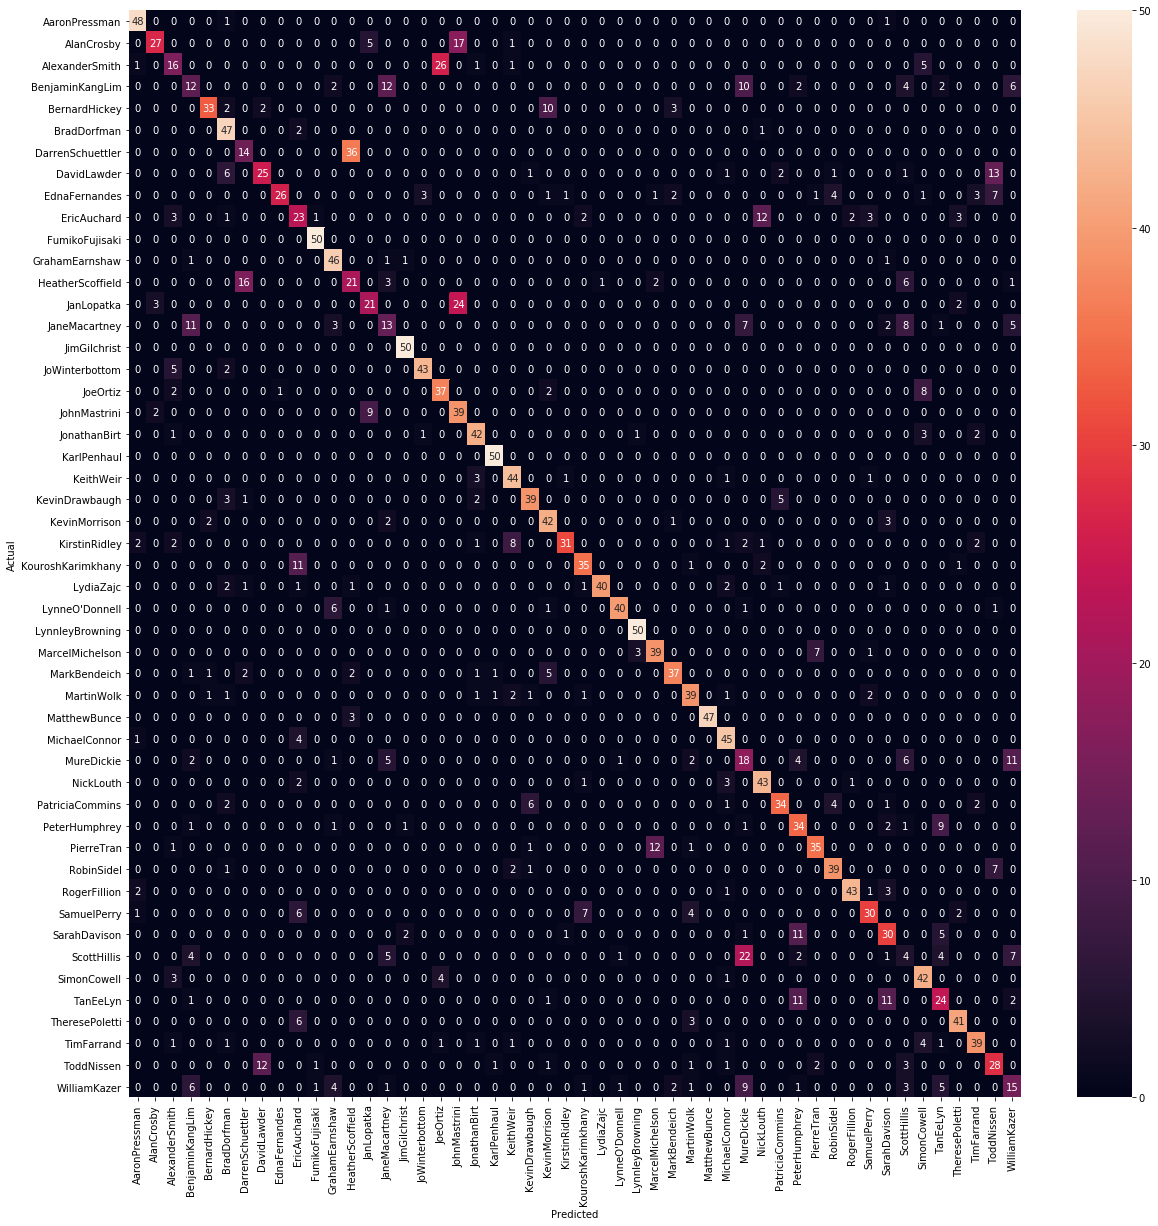

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(confusion_matrix_svm, annot=True, fmt='d',
            xticklabels=author_labels, yticklabels=author_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [13]:
accuracy_score(ay_test,svm_test_pred)

0.684

# Logistic regression

In [14]:
vectors_test.shape

(2500, 29137)

In [15]:

logistic_clf = LogisticRegression()
sgdc_clf = SGDClassifier()

In [16]:
logistic_clf.fit(vectors_train,ay_train)
sgdc_clf.fit(vectors_train, ay_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [17]:
#train_pred_log = logistic.predict(vectors_train)


In [18]:
log_test_pred = logistic_clf.predict(vectors_test)
sgdc_test_pred = sgdc_clf.predict(vectors_test)

In [19]:
log_confusion_matrix = confusion_matrix(ay_test, log_test_pred)
sgdc_confusion_matrix = confusion_matrix(ay_test, sgdc_test_pred)

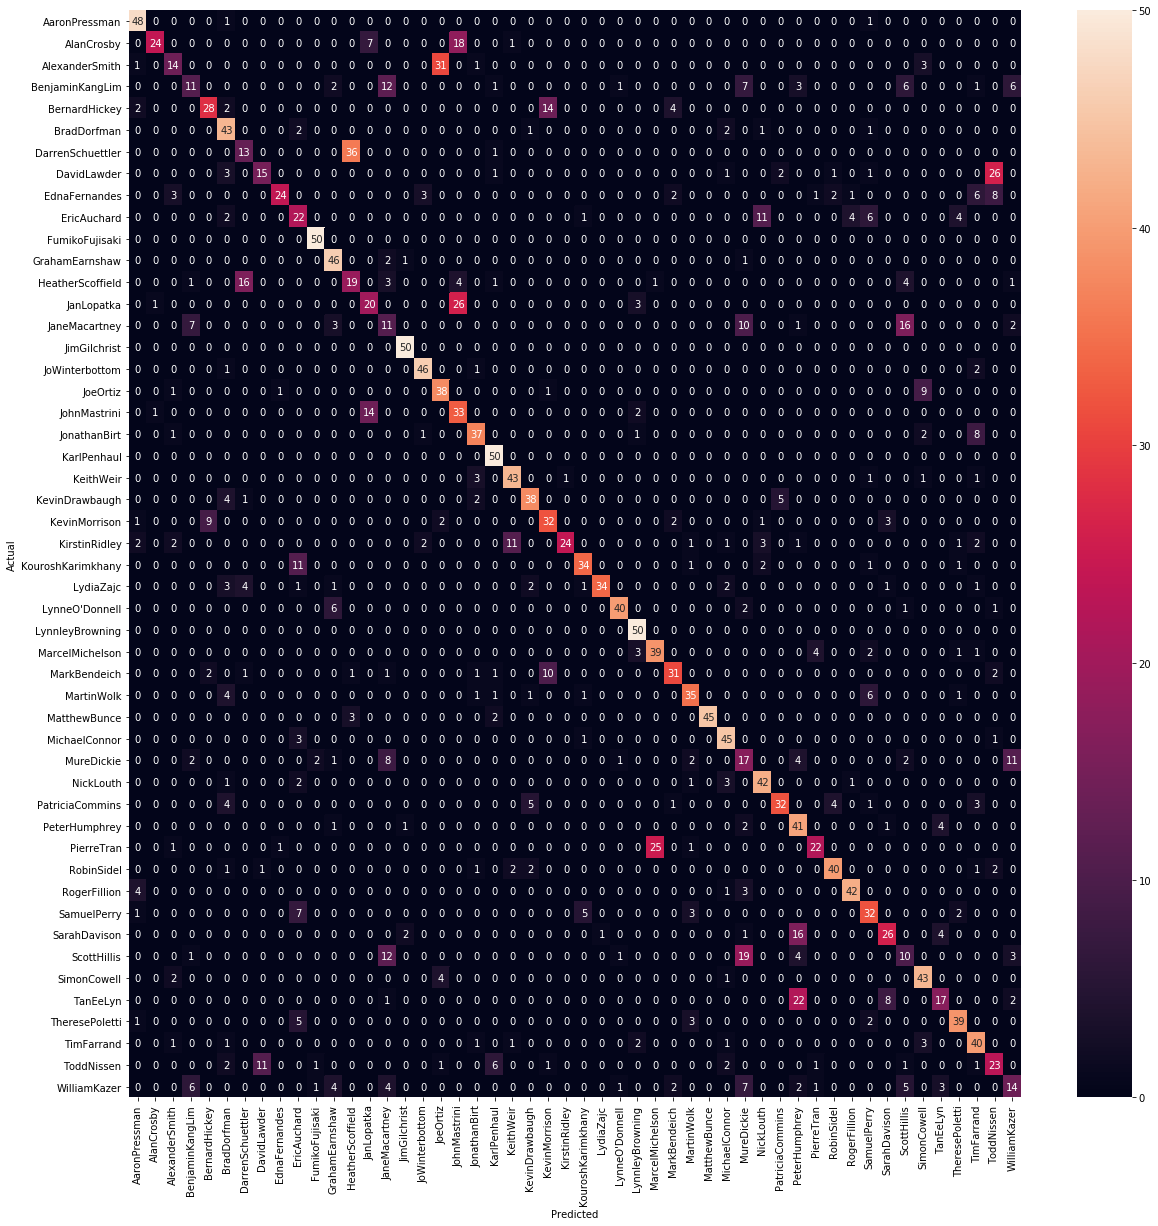

In [20]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(log_confusion_matrix, annot=True, fmt='d',
            xticklabels=author_labels, yticklabels=author_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

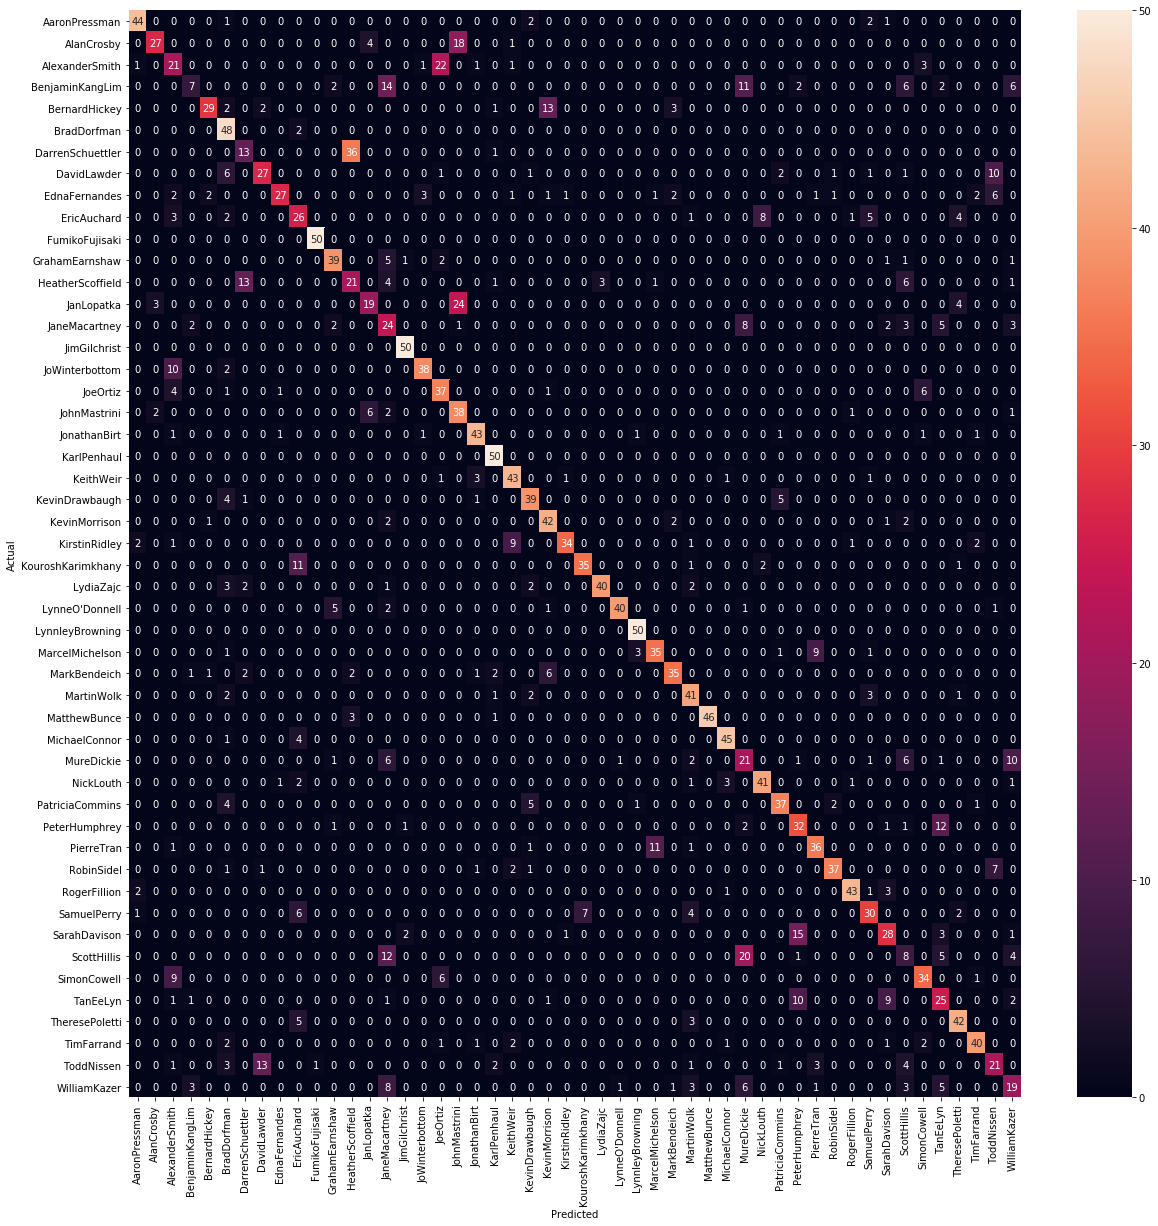

In [21]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(sgdc_confusion_matrix, annot=True, fmt='d',
            xticklabels=author_labels, yticklabels=author_labels)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [22]:
svm_score = accuracy_score(ay_test, svm_test_pred)
log_score = accuracy_score(ay_test, log_test_pred)
sgdc_score = accuracy_score(ay_test, sgdc_test_pred)



In [26]:
print(svm_score, log_score, sgdc_score)

0.684 0.6448 0.6788


In [27]:
print(classification_report(ay_test, sgdc_test_pred))


                   precision    recall  f1-score   support

    AaronPressman       0.88      0.88      0.88        50
       AlanCrosby       0.84      0.54      0.66        50
   AlexanderSmith       0.39      0.42      0.40        50
  BenjaminKangLim       0.50      0.14      0.22        50
    BernardHickey       0.88      0.58      0.70        50
      BradDorfman       0.58      0.96      0.72        50
 DarrenSchuettler       0.42      0.26      0.32        50
      DavidLawder       0.63      0.54      0.58        50
    EdnaFernandes       0.90      0.54      0.68        50
      EricAuchard       0.46      0.52      0.49        50
   FumikoFujisaki       0.98      1.00      0.99        50
   GrahamEarnshaw       0.78      0.78      0.78        50
 HeatherScoffield       0.34      0.42      0.38        50
       JanLopatka       0.66      0.38      0.48        50
    JaneMacartney       0.30      0.48      0.37        50
     JimGilchrist       0.93      1.00      0.96       

In [30]:
print(classification_report(ay_test, sgdc_test_pred))

                   precision    recall  f1-score   support

    AaronPressman       0.88      0.88      0.88        50
       AlanCrosby       0.84      0.54      0.66        50
   AlexanderSmith       0.39      0.42      0.40        50
  BenjaminKangLim       0.50      0.14      0.22        50
    BernardHickey       0.88      0.58      0.70        50
      BradDorfman       0.58      0.96      0.72        50
 DarrenSchuettler       0.42      0.26      0.32        50
      DavidLawder       0.63      0.54      0.58        50
    EdnaFernandes       0.90      0.54      0.68        50
      EricAuchard       0.46      0.52      0.49        50
   FumikoFujisaki       0.98      1.00      0.99        50
   GrahamEarnshaw       0.78      0.78      0.78        50
 HeatherScoffield       0.34      0.42      0.38        50
       JanLopatka       0.66      0.38      0.48        50
    JaneMacartney       0.30      0.48      0.37        50
     JimGilchrist       0.93      1.00      0.96       

In [33]:
forest_clf = RandomForestClassifier(random_state = 42, max_leaf_nodes = 500, n_estimators = 500)
forest_clf.fit(vectors_train, ay_train)
forest_test_pred = forest_clf.predict(vectors_test)

In [35]:
forest_clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=500,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [36]:
print(classification_report(ay_test, forest_test_pred))

                   precision    recall  f1-score   support

    AaronPressman       0.83      0.96      0.89        50
       AlanCrosby       1.00      0.48      0.65        50
   AlexanderSmith       0.73      0.60      0.66        50
  BenjaminKangLim       0.28      0.42      0.34        50
    BernardHickey       0.88      0.42      0.57        50
      BradDorfman       0.68      0.60      0.64        50
 DarrenSchuettler       0.25      0.28      0.26        50
      DavidLawder       0.47      0.16      0.24        50
    EdnaFernandes       0.78      0.28      0.41        50
      EricAuchard       0.65      0.40      0.49        50
   FumikoFujisaki       0.85      1.00      0.92        50
   GrahamEarnshaw       0.70      1.00      0.83        50
 HeatherScoffield       0.33      0.42      0.37        50
       JanLopatka       0.54      0.66      0.59        50
    JaneMacartney       0.28      0.16      0.20        50
     JimGilchrist       0.94      1.00      0.97       

In [37]:
accuracy_score(ay_test, forest_test_pred)

0.6792

In [38]:
## Using an ensemble of classifiers to get better predictions

In [39]:
voting_clf = VotingClassifier(estimators =[('log',logistic_clf), ('rf', forest_clf), ('svm', svm_clf), 
                                          ('sgdc', sgdc_clf)], voting ='hard')

In [40]:
voting_clf.fit(vectors_train, ay_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


VotingClassifier(estimators=[('log', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', Random...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [41]:
voting_pred = voting_clf.predict(vectors_test)

c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
print(accuracy_score(ay_test, voting_pred))

0.6832


In [43]:
for clf in (logistic_clf, forest_clf, svm_clf, voting_clf):
    clf.fit(vectors_train, ay_train)
    test_pred = clf.predict(vectors_test)
    print(clf.__class__.__name__, accuracy_score(ay_test, test_pred))

LogisticRegression 0.6448
RandomForestClassifier 0.6792
LinearSVC 0.684


c:\program files\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


VotingClassifier 0.678


c:\program files\python36\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [44]:
print(classification_report(ay_test, voting_pred))

                   precision    recall  f1-score   support

    AaronPressman       0.86      0.98      0.92        50
       AlanCrosby       0.89      0.50      0.64        50
   AlexanderSmith       0.49      0.34      0.40        50
  BenjaminKangLim       0.33      0.30      0.32        50
    BernardHickey       0.87      0.66      0.75        50
      BradDorfman       0.67      0.94      0.78        50
 DarrenSchuettler       0.35      0.28      0.31        50
      DavidLawder       0.69      0.50      0.58        50
    EdnaFernandes       0.96      0.48      0.64        50
      EricAuchard       0.44      0.50      0.47        50
   FumikoFujisaki       0.93      1.00      0.96        50
   GrahamEarnshaw       0.73      0.94      0.82        50
 HeatherScoffield       0.34      0.42      0.38        50
       JanLopatka       0.55      0.48      0.51        50
    JaneMacartney       0.26      0.28      0.27        50
     JimGilchrist       0.93      1.00      0.96       

In [45]:
### Not much significant improvement for ensemble of models:

# Improvements for the model:
Lemmatization of the text, considering the n-gram approach, parts of speech tagging could clean the text. Inclusion of stylometry (like counting the number of
words per sentence, and number of punctuation marks as features could improve the predictions.                                                                                                w
                                                                                                )
###  Completed for today

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier


In [47]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 500, max_samples = 1000, bootstrap = True)
bag_clf.fit(vectors_train,ay_train)

KeyboardInterrupt: 

In [ ]:
bag_test_pred = bag_clf.predict(vectors_test)

In [ ]:
accuracy_score(ay_test, bag_test_pred)

In [8]:
log(4,2)

NameError: name 'log' is not defined

In [9]:
import math


In [10]:
math.log(4,2), math.log(3,2)

(2.0, 1.5849625007211563)